## GRUPO 4
### Cabrera Dávila , Jorge Luis  /   Machacuay Navarro, Juan / Wiillian


In [118]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [119]:
df = pd.read_csv('tb_medida_estaciones.csv')
df.head(2)

,FECHA_CORTE,FECHA_MUESTRA,CUENTA,ESTACION,UNIDAD_MEDIDA,TIPO_ESTACION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CAUDAL07H,PROMEDIO24H,MAXIMA24H,PRECIP24H
0,20230706,20230706,PRESA EJIDOS,CANAL PRINCIPAL,m3/s,HIDROMETRICA,Piura,Piura,Castilla,200104,11.41,11.42,0.0,0.0
1,20230706,20230706,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,56.00,62.00,67.0,0.0


In [120]:
# Convertir las cadenas de texto a datetime
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], format='%Y%m%d')
df['FECHA_MUESTRA'] = pd.to_datetime(df['FECHA_MUESTRA'], format='%Y%m%d')
df.sort_values(by=['FECHA_CORTE', 'FECHA_MUESTRA'], ascending=[True, True], inplace=True)
# Cambiar el formato a DD/MM/YYYY
df['FECHA_CORTE'] = df['FECHA_CORTE'].dt.strftime('%d/%m/%Y')
df['FECHA_MUESTRA'] = df['FECHA_MUESTRA'].dt.strftime('%d/%m/%Y')

In [122]:
df.head(2)

,FECHA_CORTE,FECHA_MUESTRA,CUENTA,ESTACION,UNIDAD_MEDIDA,TIPO_ESTACION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CAUDAL07H,PROMEDIO24H,MAXIMA24H,PRECIP24H
14877,06/09/2022,01/01/2022,PRESA EJIDOS,CANAL PRINCIPAL,m3/s,HIDROMETRICA,Piura,Piura,Castilla,200104,6.5,6.96,0.0,0.0
14878,06/09/2022,01/01/2022,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,3.0,0.50,3.0,0.0


In [134]:
df1 = df[((df['FECHA_CORTE'] =='06/07/2023') & (df['ESTACION'] == 'PTE. SANCHEZ CERRO' ))]

In [135]:
df1.head(50)

,FECHA_CORTE,FECHA_MUESTRA,CUENTA,ESTACION,UNIDAD_MEDIDA,TIPO_ESTACION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CAUDAL07H,PROMEDIO24H,MAXIMA24H,PRECIP24H
784,06/07/2023,07/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,99.0,102.50,106.0,0.0
757,06/07/2023,08/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,95.0,98.00,99.0,0.0
730,06/07/2023,09/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,80.0,90.79,104.0,0.0
703,06/07/2023,10/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,84.0,89.29,95.0,0.0
676,06/07/2023,11/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,91.0,95.08,99.0,0.0
649,06/07/2023,12/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,84.0,92.42,95.0,0.0
622,06/07/2023,13/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,84.0,87.50,91.0,0.0
595,06/07/2023,14/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,80.0,85.67,88.0,0.0
568,06/07/2023,15/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,75.0,77.50,80.0,0.0
541,06/07/2023,16/06/2023,PRESA EJIDOS,PTE. SANCHEZ CERRO,m3/s,HIDROLOGICA,Piura,Piura,Castilla,200104,75.0,75.00,75.0,0.0


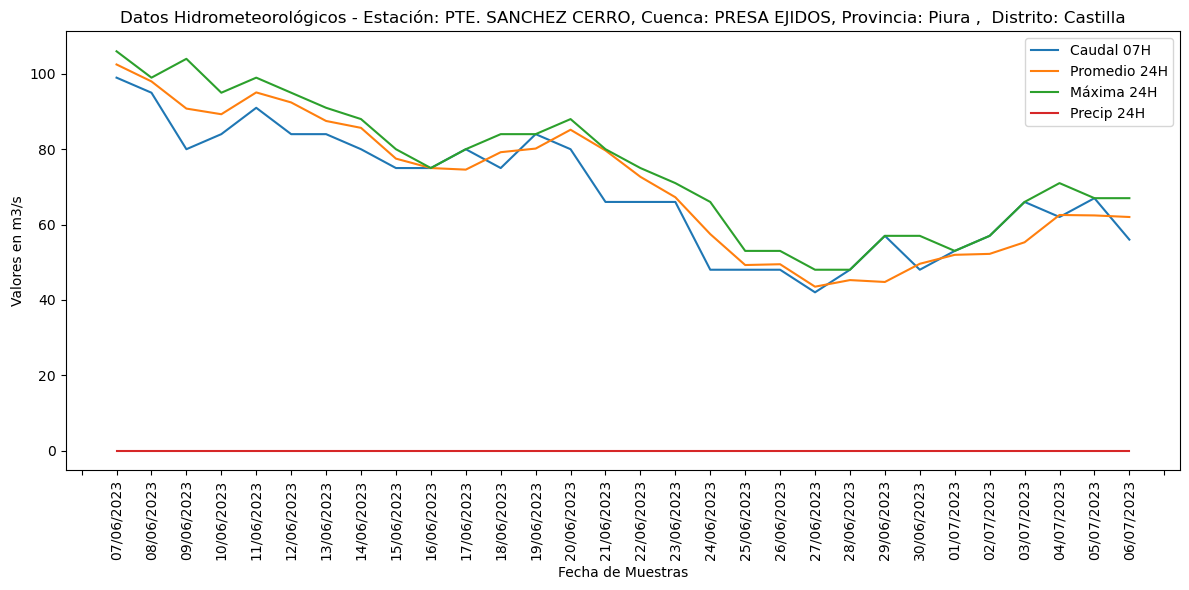

In [136]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

cuenta = df1['CUENTA'].iloc[0]
estacion = df1['ESTACION'].iloc[0]
#departamento = df1['DEPARTAMENTO'].iloc[0]
provincia = df1['PROVINCIA'].iloc[0]
distrito = df1['DISTRITO'].iloc[0]
unidad= df1['UNIDAD_MEDIDA'].iloc[0]
# Creando el gráfico
plt.figure(figsize=(12, 6))
plt.plot(df1['FECHA_MUESTRA'], df1['CAUDAL07H'], label='Caudal 07H')
plt.plot(df1['FECHA_MUESTRA'], df1['PROMEDIO24H'], label='Promedio 24H')
plt.plot(df1['FECHA_MUESTRA'], df1['MAXIMA24H'], label='Máxima 24H')
plt.plot(df1['FECHA_MUESTRA'], df1['PRECIP24H'], label='Precip 24H')

plt.xlabel('Fecha de Muestras')
plt.ylabel(f'Valores en {unidad}')
plt.title(f'Datos Hidrometeorológicos - Estación: {estacion}, Cuenca: {cuenta}, Provincia: {provincia},  Distrito: {distrito}')
plt.legend()

# Configurar el localizador de fechas para 30 ticks en el eje X
locator = mdates.AutoDateLocator(minticks=30, maxticks=40)
plt.gca().xaxis.set_major_locator(locator)
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()